In [198]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss
import itertools


# Función de optimización de DBSCAN

In [199]:
epsilons = np.linspace(0.01, 1, num=30)
epsilons

array([0.01      , 0.04413793, 0.07827586, 0.11241379, 0.14655172,
       0.18068966, 0.21482759, 0.24896552, 0.28310345, 0.31724138,
       0.35137931, 0.38551724, 0.41965517, 0.4537931 , 0.48793103,
       0.52206897, 0.5562069 , 0.59034483, 0.62448276, 0.65862069,
       0.69275862, 0.72689655, 0.76103448, 0.79517241, 0.82931034,
       0.86344828, 0.89758621, 0.93172414, 0.96586207, 1.        ])

In [200]:
min_samples = np.arange(2, 20, step=1)
min_samples

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

In [201]:

combinations = list(itertools.product(epsilons, min_samples))
combinations

[(0.01, 2),
 (0.01, 3),
 (0.01, 4),
 (0.01, 5),
 (0.01, 6),
 (0.01, 7),
 (0.01, 8),
 (0.01, 9),
 (0.01, 10),
 (0.01, 11),
 (0.01, 12),
 (0.01, 13),
 (0.01, 14),
 (0.01, 15),
 (0.01, 16),
 (0.01, 17),
 (0.01, 18),
 (0.01, 19),
 (0.04413793103448276, 2),
 (0.04413793103448276, 3),
 (0.04413793103448276, 4),
 (0.04413793103448276, 5),
 (0.04413793103448276, 6),
 (0.04413793103448276, 7),
 (0.04413793103448276, 8),
 (0.04413793103448276, 9),
 (0.04413793103448276, 10),
 (0.04413793103448276, 11),
 (0.04413793103448276, 12),
 (0.04413793103448276, 13),
 (0.04413793103448276, 14),
 (0.04413793103448276, 15),
 (0.04413793103448276, 16),
 (0.04413793103448276, 17),
 (0.04413793103448276, 18),
 (0.04413793103448276, 19),
 (0.07827586206896552, 2),
 (0.07827586206896552, 3),
 (0.07827586206896552, 4),
 (0.07827586206896552, 5),
 (0.07827586206896552, 6),
 (0.07827586206896552, 7),
 (0.07827586206896552, 8),
 (0.07827586206896552, 9),
 (0.07827586206896552, 10),
 (0.07827586206896552, 11),
 (0.07

In [202]:
N = len(combinations)
N

540

In [203]:
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1

    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue

    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1],
          'best_labels': best_labels,
          'best_score': best_score}



# MODELO 1: Distribucion de fuentes de electricidad, Población

In [204]:
df = pd.read_csv(r"../datasets/wec_ns.csv")
df.head(5)

,country,population,low_carbon_share_elec,fossil_share_elec,renewables_share_elec,nuclear_share_elec,fossil_cons_per_capita,per_capita_electricity,continente,iso_code,acceso_elec
0,Afghanistan,3.424733e+07,83.543444,16.456556,83.543444,0.0,5.156111,31.813000,Asia,AFG,97.70000
1,Albania,2.896444e+06,99.851444,0.148556,99.851444,0.0,2.103889,1998.432000,Europa,ALB,100.00000
2,Algeria,3.978422e+07,0.766333,99.233667,0.766333,0.0,1568.103333,1580.157222,África,DZA,99.80413
3,Angola,2.794056e+07,65.673556,34.326444,65.673556,0.0,110.650000,326.007889,África,AGO,46.89061
4,Antigua and Barbuda,9.344444e+04,1.572000,98.428000,1.572000,0.0,3415.806889,3470.763111,Norteamérica,ATG,100.00000


# De que fuentes proviene la electricad que consumimos?

In [223]:
features4 = ["fossil_share_elec", "renewables_share_elec","nuclear_share_elec"]
X4 = df[features4]
X4.head(5)

,fossil_share_elec,renewables_share_elec,nuclear_share_elec
0,16.456556,83.543444,0.0
1,0.148556,99.851444,0.0
2,99.233667,0.766333,0.0
3,34.326444,65.673556,0.0
4,98.428000,1.572000,0.0


In [224]:
pd.DataFrame(X4).head(5)

,fossil_share_elec,renewables_share_elec,nuclear_share_elec
0,16.456556,83.543444,0.0
1,0.148556,99.851444,0.0
2,99.233667,0.766333,0.0
3,34.326444,65.673556,0.0
4,98.428000,1.572000,0.0


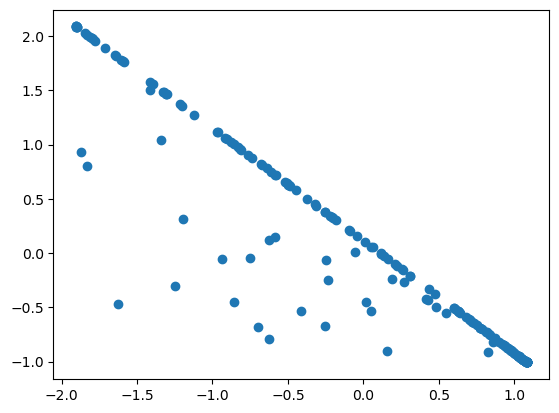

In [225]:
X4_scaled = StandardScaler().fit_transform(X4)

plt.scatter(X4_scaled[:, 0], X4_scaled[:, 1])

In [226]:
best_dict4 = get_scores_and_labels(combinations, X4_scaled)

Index: 0, Score: 0.06769617250246172, Labels: [-1  0  1 -1  2 -1 -1  3  3 -1 -1  1  1  2  2  2 -1  4  5  1  0 -1 -1  1
 -1  1  1 -1  6  7 -1 -1 -1  1  4  2 -1 -1 -1  5 -1 -1 -1 -1 -1 -1  0 -1
  1  8 -1 -1 -1 -1 -1  5  3  0  9 -1 -1 -1 -1  1 10 -1  9  1 11  7  2  2
 -1 12  2  2  6 -1  1 -1  0 -1 -1 -1 -1 -1  2 -1 13 -1 14 15 10 15  1 16
 -1 -1  5  0  1  1 -1 -1 17 16 18  1 -1 19 -1 -1 -1 -1 20 21  6 -1 -1  1
  0 -1  6 10 12  2 -1 -1 -1  1 -1  1 -1  0 -1 11 18 -1 14  1 -1 -1 -1  5
  1  6 -1 13  1 -1 -1  1 22  5 -1 -1 -1  5 -1 -1  1 -1 -1 22 17 -1 -1 19
 -1 -1 18 -1  1  1  5  8  1  1 -1 -1  1 -1 -1  1 -1 -1  6 -1 -1 20 -1 21], NumClusters: 23
Index: 1, Score: -0.06675363487786685, Labels: [-1  0  1 -1  2 -1 -1  3  3 -1 -1  1  1  2  2  2 -1 -1  4  1  0 -1 -1  1
 -1  1  1 -1  5 -1 -1 -1 -1  1 -1  2 -1 -1 -1  4 -1 -1 -1 -1 -1 -1  0 -1
  1 -1 -1 -1 -1 -1 -1  4  3  0 -1 -1 -1 -1 -1  1  6 -1 -1  1 -1 -1  2  2
 -1 -1  2  2  5 -1  1 -1  0 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1  6 -1  1 -1
 -1 -1  4  0 

In [227]:
best_dict4

{'best_epsilon': 0.41965517241379313,
 'best_min_samples': 19,
 'best_labels': array([ 1,  1,  0,  2,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,
         1,  0,  0,  1,  2,  2,  0,  1,  0,  0, -1,  0,  1,  2,  2, -1,  0,
         1,  0,  2,  0, -1,  0,  2,  1,  2,  0,  0, -1,  1,  2,  0,  2,  0,
         2,  0,  2,  0,  0,  0,  1,  2, -1, -1,  2,  2,  0,  1, -1,  2,  0,
         0,  1,  0,  0,  2,  2,  0,  0,  0,  2,  0, -1,  1,  0,  0,  0,  0,
         0,  0,  2,  0,  0,  0,  0,  1,  0,  0,  1,  1,  2,  0,  1,  0,  0,
         2,  2,  2,  1,  0,  0,  2,  0,  0,  0,  0,  0,  0,  2,  0,  1,  1,
         0,  1,  0,  0,  1,  2,  0,  0, -1,  1,  0, -1,  0,  2,  1,  2,  0,
         0,  2,  0,  0, -1, -1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
         0, -1, -1,  0,  0,  0, -1,  0, -1,  2,  2,  2, -1, -1,  0,  1,  2,
         0,  2,  0,  0,  0,  2,  0,  0,  1, -1,  0, -1, -1,  0,  1,  0,  0,
         2,  2,  0,  1,  2], dtype=int64),
 'best_score': 0.6198101672066748}

In [228]:
df['cluster4'] = best_dict4['best_labels']

df['cluster4'].value_counts()

cluster4
 0    99
 2    41
 1    28
-1    24
Name: count, dtype: int64

In [229]:
fig = px.scatter(x=df["fossil_share_elec"], y=df["renewables_share_elec"], color=df['cluster4'])
fig.show()

In [230]:
fig = px.scatter(x=df["nuclear_share_elec"], y=df["renewables_share_elec"], color=df['cluster4'])
fig.show()

In [236]:
df_ruido = df[df["cluster4"] == -1]

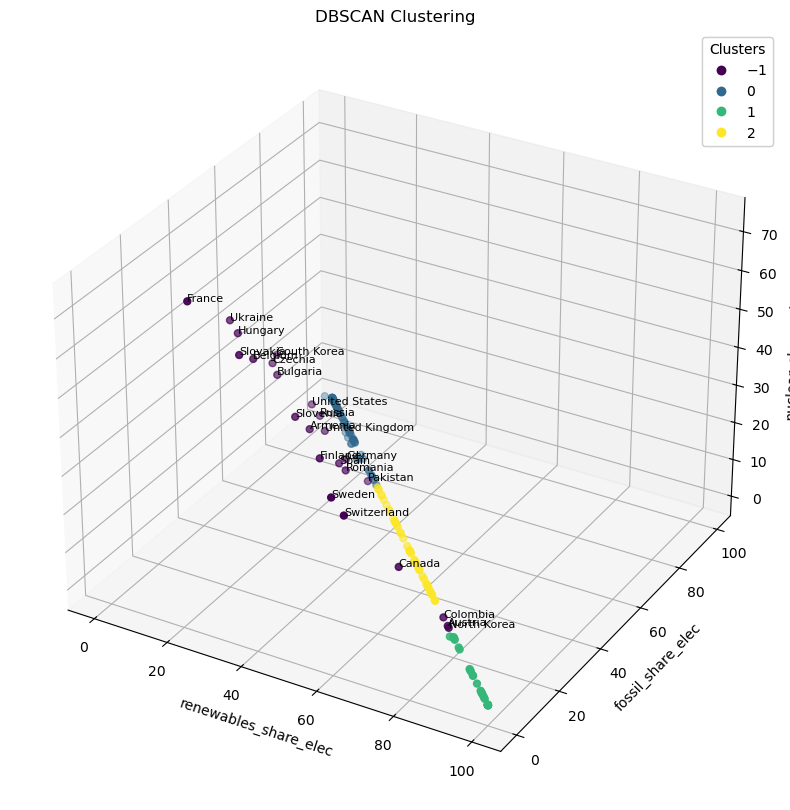

In [238]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Suponiendo que tienes un DataFrame llamado df con la columna 'country'
# Asegúrate de tener la columna 'country' en tu DataFrame

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['renewables_share_elec'], df['fossil_share_elec'], df['nuclear_share_elec'],
                     c=df['cluster4'], cmap='viridis', s=25)

# Iterar a través de cada punto y agregar el texto correspondiente
for country, x, y, z in zip(df_ruido['country'], df_ruido['renewables_share_elec'], df_ruido['fossil_share_elec'], df_ruido['nuclear_share_elec']):
    ax.text(x, y, z, country, fontsize=8)

ax.set_xlabel('renewables_share_elec')
ax.set_ylabel('fossil_share_elec')
ax.set_zlabel('nuclear_share_elec')
ax.set_title('DBSCAN Clustering')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()


In [231]:
df.sort_values("nuclear_share_elec")

,country,population,low_carbon_share_elec,fossil_share_elec,renewables_share_elec,nuclear_share_elec,fossil_cons_per_capita,per_capita_electricity,continente,iso_code,acceso_elec,cluster1,cluster4
0,Afghanistan,3.424733e+07,83.543444,16.456556,83.543444,0.000000,5.156111,31.813000,Asia,AFG,97.700000,0,1
114,Mongolia,2.997778e+06,4.853800,95.146200,4.853800,0.000000,1688.058700,1778.117200,Asia,MNG,98.100000,0,0
115,Montenegro,6.268889e+05,55.749444,44.250556,55.749444,0.000000,2162.070222,5001.308222,Europa,MNE,100.000000,0,2
116,Morocco,3.464489e+07,15.340222,84.659778,15.340222,0.000000,697.677111,827.142556,África,MAR,100.000000,0,0
117,Mozambique,2.714233e+07,90.126111,9.873889,90.126111,0.000000,59.980444,620.169667,África,MOZ,30.603832,0,1
118,Namibia,2.319778e+06,97.596333,2.403667,97.596333,0.000000,15.070222,618.638333,África,NAM,56.258694,0,1
119,Nauru,1.033333e+04,0.000000,100.000000,0.000000,0.000000,2721.885556,2721.885556,Oceanía,NRU,100.000000,0,0
120,Nepal,2.738544e+07,99.905111,0.094889,99.905111,0.000000,0.124000,149.527667,Asia,NPL,89.900000,0,1
122,New Caledonia,2.705556e+05,15.024333,84.975667,15.024333,0.000000,8474.586889,9927.835444,Oceanía,NCL,100.000000,0,0
113,Moldova,4.066111e+06,6.086444,93.913556,6.086444,0.000000,1197.070444,1273.847889,Europa,MDA,100.000000,0,0


In [239]:
suram = df[df["continente"] == "Sudamérica"]

In [240]:
suram.sort_values("nuclear_share_elec")

,country,population,low_carbon_share_elec,fossil_share_elec,renewables_share_elec,nuclear_share_elec,fossil_cons_per_capita,per_capita_electricity,continente,iso_code,acceso_elec,cluster1,cluster4
21,Bolivia,1.086678e+07,31.721000,68.279000,31.721000,0.0000,529.824700,775.388700,Sudamérica,BOL,97.55412,0,2
36,Chile,1.803267e+07,43.702900,56.297100,43.702900,0.0000,2255.461200,4013.349500,Sudamérica,CHL,100.00000,0,2
38,Colombia,4.775644e+07,73.789700,26.210300,73.789700,0.0000,394.952700,1493.816900,Sudamérica,COL,100.00000,0,-1
51,Ecuador,1.625811e+07,61.819111,38.180889,61.819111,0.0000,577.502889,1545.639778,Sudamérica,ECU,98.85000,0,2
75,Guyana,7.671111e+05,2.016000,97.984000,2.016000,0.0000,1270.138111,1296.136556,Sudamérica,GUY,92.54054,0,0
133,Paraguay,6.689000e+06,99.996111,0.003889,99.996111,0.0000,0.329556,8647.857556,Sudamérica,PRY,100.00000,0,1
134,Peru,3.066389e+07,57.749400,42.250600,57.749400,0.0000,640.518200,1520.790700,Sudamérica,PER,99.31181,0,2
164,Suriname,5.586667e+05,44.775778,55.224222,44.775778,0.0000,1888.589889,3406.356556,Sudamérica,SUR,98.20477,0,2
184,Uruguay,3.413444e+06,89.665100,10.334900,89.665100,0.0000,348.945000,3825.651500,Sudamérica,URY,100.00000,0,1
187,Venezuela,2.942344e+07,63.628444,36.371556,63.628444,0.0000,1310.485111,3638.922222,Sudamérica,VEN,100.00000,0,2


Since transport and heating tend to be harder to decarbonize – they are more reliant on oil and gas – renewables tend to have a higher share in the electricity mix versus the total energy mix.